In [6]:
import matplotlib.pyplot as plt
import os, warnings
import pandas as pd
import numpy as np

import keras
from keras import layers
import tensorflow as tf
from custom_functions import custom_image_dataset_for_pdd_model


def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    label = tf.cast(label, dtype=tf.float32)
    return image, label


def set_seed(seed=19893):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    os.environ["TF_DETERMINISTIC_OPS"] = "1"


set_seed()
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=16, titlepad=10)
plt.rc("image", cmap="magma")
warnings.filterwarnings("ignore")
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [7]:

pre_trained_model = 'C:/Users/USER/Documents/models/cv-course-models/cv-course-models/vgg16-pretrained-base'
train_data_path = "C:/Users/USER/Documents/datasets/plant disease recognition dataset/Train/Train/plants.csv"
train_image_path = "C:/Users/USER/Documents/datasets/plant disease recognition dataset/Train/Train/"
test_data_path = "C:/Users/USER/Documents/datasets/plant disease recognition dataset/Train/Train/plants.csv"
test_image_path = "C:/Users/USER/Documents/datasets/plant disease recognition dataset/Train/Train"

In [21]:
from keras.utils import image_dataset_from_directory as idf
train_ = idf(train_image_path, shuffle=True, batch_size=128, interpolation="nearest", seed=101, image_size=(128, 128))
valid_ = idf(test_image_path, shuffle=True, batch_size=128, interpolation="nearest", seed=101, image_size=(128, 128))

train_ = (train_.map(convert_to_float).cache().prefetch(buffer_size=AUTOTUNE))
valid_ = (valid_.map(convert_to_float).cache().prefetch(buffer_size=AUTOTUNE))

Found 1322 files belonging to 3 classes.
Found 1322 files belonging to 3 classes.


In [16]:
pretrained_base = keras.models.load_model(pre_trained_model)
pretrained_base.trainable = False

In [28]:
model = keras.Sequential([
    pretrained_base,
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=[128, 128, 3]),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    layers.Flatten(),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=3, activation="softmax"),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [29]:
history = model.fit(train_, validation_data=valid_, epochs=10, verbose=2)
print("Done training of model...")

Epoch 1/10


11/11 - 416s - loss: 0.9829 - accuracy: 0.5348 - val_loss: 0.7003 - val_accuracy: 0.6982 - 416s/epoch - 38s/step
Epoch 2/10
11/11 - 306s - loss: 0.6404 - accuracy: 0.7118 - val_loss: 0.7650 - val_accuracy: 0.6392 - 306s/epoch - 28s/step
Epoch 3/10
11/11 - 260s - loss: 0.5060 - accuracy: 0.7912 - val_loss: 0.3675 - val_accuracy: 0.8661 - 260s/epoch - 24s/step
Epoch 4/10
11/11 - 243s - loss: 0.3236 - accuracy: 0.8850 - val_loss: 0.2936 - val_accuracy: 0.8873 - 243s/epoch - 22s/step
Epoch 5/10
11/11 - 253s - loss: 0.2448 - accuracy: 0.9070 - val_loss: 0.3108 - val_accuracy: 0.8601 - 253s/epoch - 23s/step
Epoch 6/10
11/11 - 247s - loss: 0.2192 - accuracy: 0.9175 - val_loss: 0.1412 - val_accuracy: 0.9644 - 247s/epoch - 22s/step
Epoch 7/10
11/11 - 265s - loss: 0.1551 - accuracy: 0.9463 - val_loss: 0.2295 - val_accuracy: 0.9002 - 265s/epoch - 24s/step
Epoch 8/10
11/11 - 271s - loss: 0.1427 - accuracy: 0.9546 - val_loss: 0.1015 - val_accuracy: 0.9690 - 271s/epoch - 25s/step
Epoch 9/10
11/11 - 

In [32]:

save_dir = "C:/Users/USER/Documents/models"
os.makedirs(save_dir, exist_ok=True)
model.save(os.path.join(save_dir, "plant_disease_detection_model.h5"))
plt.show()

KeyError: "['sparse_categorical_crossentropy'] not in index"

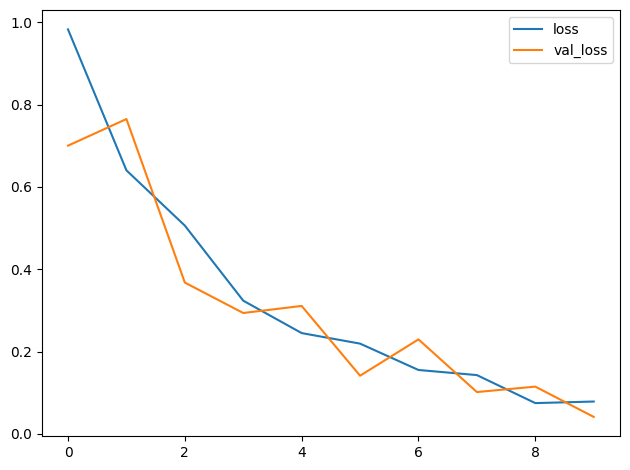

In [33]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['sparse_categorical_crossentropy', 'accuracy']].plot()
